# Dataset: Viviendas de Boston, incluido ek sklearn
Índice<a name="indice"></a>  
* [1 OLS simple (dos variables) con aparente realación lienal (RM y Price)](#1) 
* [2 OLS simple (dos variables) sin realiación lineal (RAD y Price)](#2) 
* [3 OLS múltiple(toddas las variables) con el DF sin tratar](#3) 
* [4 OLS múltiple(toddas las variables) con el DF sin outliers, sin correlaciones y normalizado](#4) 
* [5 Conclusión final](#5) 

In [1]:
# LIBRERÍAS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlación
from scipy import stats
# Normalización
from sklearn.preprocessing import StandardScaler
# Regresión lineal
from sklearn.linear_model import LinearRegression
# Métricas de evaluación
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Partición en entrenamiento y test
from sklearn.model_selection import train_test_split

# Dataset Viviendas de Boston
from sklearn.datasets import load_boston

# mis funciones
import funciones as mf
import misFunc as mf2

In [2]:
# Cargar el dataset
boston = load_boston()

C:\Users\Profesor\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
df=pd.concat([df,pd.DataFrame(boston['target'],columns=['Price'])],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [21]:
# Generar csv
df.to_csv('viviendasBoston.csv')

In [24]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [6]:
# Filas y columnasdf.
df.shape

(506, 14)

In [7]:
#Nulos
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [8]:
# Tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
# Esta variables debería ser categórica
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [10]:
# Trasnformamos a categórica
df['CHAS'] = pd.Categorical(df['CHAS'])

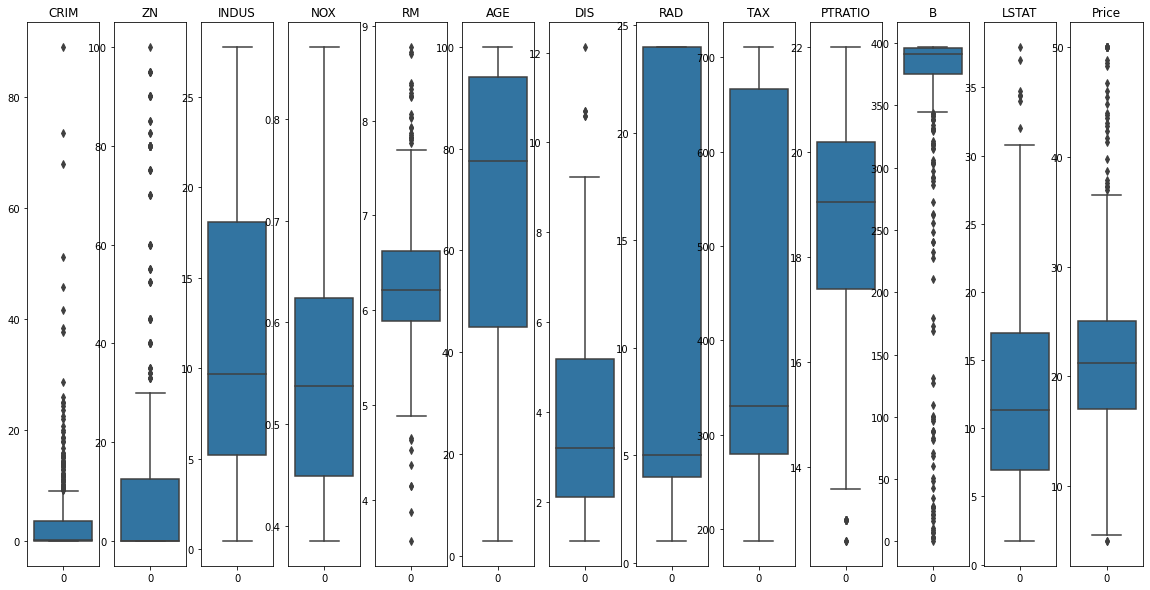

In [11]:
# Outliers - Pintar cajas y bigotes de variables numericas
dfNum = df.select_dtypes(include='float64').copy()


plt.subplots(sharex=False, sharey=False, figsize=(20,10))
for i in range(len(dfNum.columns)):
    # Crear subgráfica
    ax = plt.subplot(1,len(dfNum.columns),i+1)
    # Mostrar gráfica
    sns.boxplot(data=dfNum.iloc[:,i],ax = ax)
    # Título de la gráfica es la columna
    ax.set_title(dfNum.columns[i])

In [12]:
# Quitamos el precio para no quitar outliers de esta columna
dfNum.drop('Price',axis=1,inplace=True)
#Quitar outliers   
dfNum = mf.quitarOutliers(dfNum)

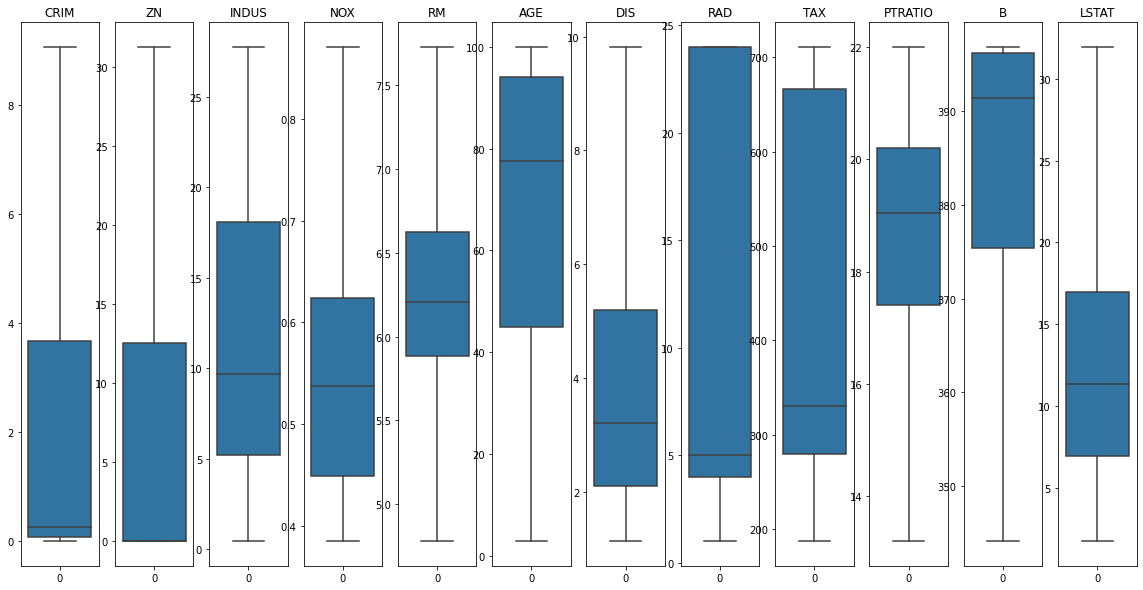

In [13]:
plt.subplots(sharex=False, sharey=False, figsize=(20,10))
for i in range(len(dfNum.columns)):
    # Crear subgráfica
    ax = plt.subplot(1,len(dfNum.columns),i+1)
    # Mostrar gráfica
    sns.boxplot(data=dfNum.iloc[:,i],ax = ax)
    # Título de la gráfica es la columna
    ax.set_title(dfNum.columns[i])

<AxesSubplot:>

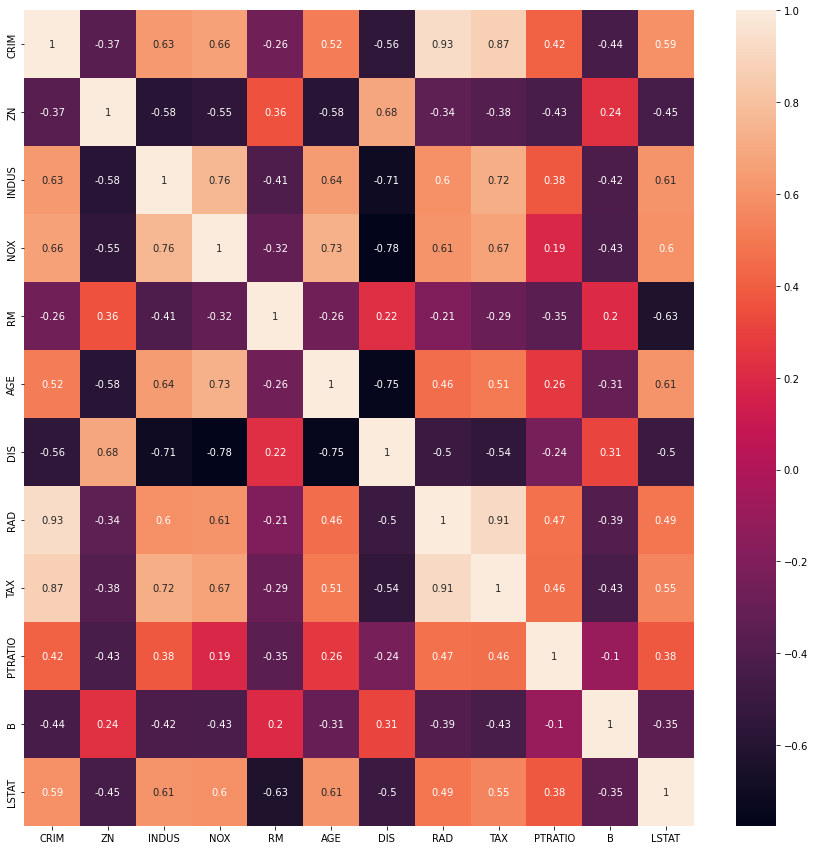

In [14]:
# Correlación
plt.figure(figsize=(15,15))
sns.heatmap(dfNum.corr(),annot=True)

In [15]:
# Probar con multicolinealidad (VIF > 10)
DfVif = mf2.seleccionarPorVIF(dfNum,10)
DfVif

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [16]:
dfNum=DfVif

In [17]:
# Normalización
for c in dfNum.columns:
    # Calculamos shapiro test
    stat, pvalor = stats.shapiro(dfNum[c])
    if(pvalor>0.05):
        print(f"La variable {c} PROVIENE de una distribución normal: PVALUE->{pvalor}")
    else:
        print(f"La variable {c} NO PROVIENE de una distribución normal: PVALUE->{pvalor} ")
    

La variable CRIM NO PROVIENE de una distribución normal: PVALUE->1.7975565573226355e-30 
La variable ZN NO PROVIENE de una distribución normal: PVALUE->5.855361807398424e-33 
La variable INDUS NO PROVIENE de una distribución normal: PVALUE->1.0642289039786765e-17 
La variable NOX NO PROVIENE de una distribución normal: PVALUE->5.775851259944009e-14 
La variable RM NO PROVIENE de una distribución normal: PVALUE->1.5714314827164344e-07 
La variable AGE NO PROVIENE de una distribución normal: PVALUE->2.230570069931666e-18 
La variable DIS NO PROVIENE de una distribución normal: PVALUE->3.700617463382584e-17 
La variable TAX NO PROVIENE de una distribución normal: PVALUE->1.1629678554442183e-23 
La variable PTRATIO NO PROVIENE de una distribución normal: PVALUE->2.233452173980954e-17 
La variable B NO PROVIENE de una distribución normal: PVALUE->1.193256889735755e-27 
La variable LSTAT NO PROVIENE de una distribución normal: PVALUE->1.4969853156555912e-13 


In [18]:
# Normalizar con StandarScaler
modelo = StandardScaler()
dfNorm = modelo.fit_transform(dfNum)
dfNorm

array([[-0.67029001,  0.91842034, -1.2879095 , ..., -1.4771812 ,
         0.78698807, -1.08874875],
       [-0.66394877, -0.57947069, -0.59338101, ..., -0.30994139,
         0.78698807, -0.49530164],
       [-0.66395481, -0.57947069, -0.59338101, ..., -0.30994139,
         0.57318348, -1.22427153],
       ...,
       [-0.65384327, -0.57947069,  0.11573841, ...,  1.18412558,
         0.78698807, -0.99459609],
       [-0.63909135, -0.57947069,  0.11573841, ...,  1.18412558,
         0.60575322, -0.87476542],
       [-0.6578764 , -0.57947069,  0.11573841, ...,  1.18412558,
         0.78698807, -0.67504764]])

In [19]:
dfNorm = pd.DataFrame(dfNorm,columns=dfNum.columns)
dfNorm

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.670290,0.918420,-1.287909,-0.144217,0.475982,-0.120013,0.148015,-0.666608,-1.477181,0.786988,-1.088749
1,-0.663949,-0.579471,-0.593381,-0.740262,0.231390,0.367166,0.572202,-0.987329,-0.309941,0.786988,-0.495302
2,-0.663955,-0.579471,-0.593381,-0.740262,1.444822,-0.265812,0.572202,-0.987329,-0.309941,0.573183,-1.224272
3,-0.662420,-0.579471,-1.306878,-0.835284,1.147817,-0.809889,1.101820,-1.106115,0.110265,0.667741,-1.379766
4,-0.651339,-0.579471,-1.306878,-0.835284,1.384468,-0.511180,1.101820,-1.106115,0.110265,0.786988,-1.038819
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.653278,-0.579471,0.115738,0.158124,0.504571,0.018673,-0.631298,-0.803212,1.184126,0.529057,-0.419694
502,-0.658523,-0.579471,0.115738,0.158124,-0.246676,0.288933,-0.723719,-0.803212,1.184126,0.786988,-0.503861
503,-0.653843,-0.579471,0.115738,0.158124,1.112875,0.797449,-0.781754,-0.803212,1.184126,0.786988,-0.994596
504,-0.639091,-0.579471,0.115738,0.158124,0.823812,0.736996,-0.674679,-0.803212,1.184126,0.605753,-0.874765


In [20]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [30]:
dfNormTodo = pd.concat([dfNorm,df['Price']],axis=1)

In [31]:
dfNormTodo

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
0,-0.670290,0.918420,-1.287909,-0.144217,0.475982,-0.120013,0.148015,-0.666608,-1.477181,0.786988,-1.088749,24.0
1,-0.663949,-0.579471,-0.593381,-0.740262,0.231390,0.367166,0.572202,-0.987329,-0.309941,0.786988,-0.495302,21.6
2,-0.663955,-0.579471,-0.593381,-0.740262,1.444822,-0.265812,0.572202,-0.987329,-0.309941,0.573183,-1.224272,34.7
3,-0.662420,-0.579471,-1.306878,-0.835284,1.147817,-0.809889,1.101820,-1.106115,0.110265,0.667741,-1.379766,33.4
4,-0.651339,-0.579471,-1.306878,-0.835284,1.384468,-0.511180,1.101820,-1.106115,0.110265,0.786988,-1.038819,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.653278,-0.579471,0.115738,0.158124,0.504571,0.018673,-0.631298,-0.803212,1.184126,0.529057,-0.419694,22.4
502,-0.658523,-0.579471,0.115738,0.158124,-0.246676,0.288933,-0.723719,-0.803212,1.184126,0.786988,-0.503861,20.6
503,-0.653843,-0.579471,0.115738,0.158124,1.112875,0.797449,-0.781754,-0.803212,1.184126,0.786988,-0.994596,23.9
504,-0.639091,-0.579471,0.115738,0.158124,0.823812,0.736996,-0.674679,-0.803212,1.184126,0.605753,-0.874765,22.0


In [33]:
dfNormTodo.to_csv('ViviendasBostonNormalizado.csv')

## 1 REGRESÓN LINEAL

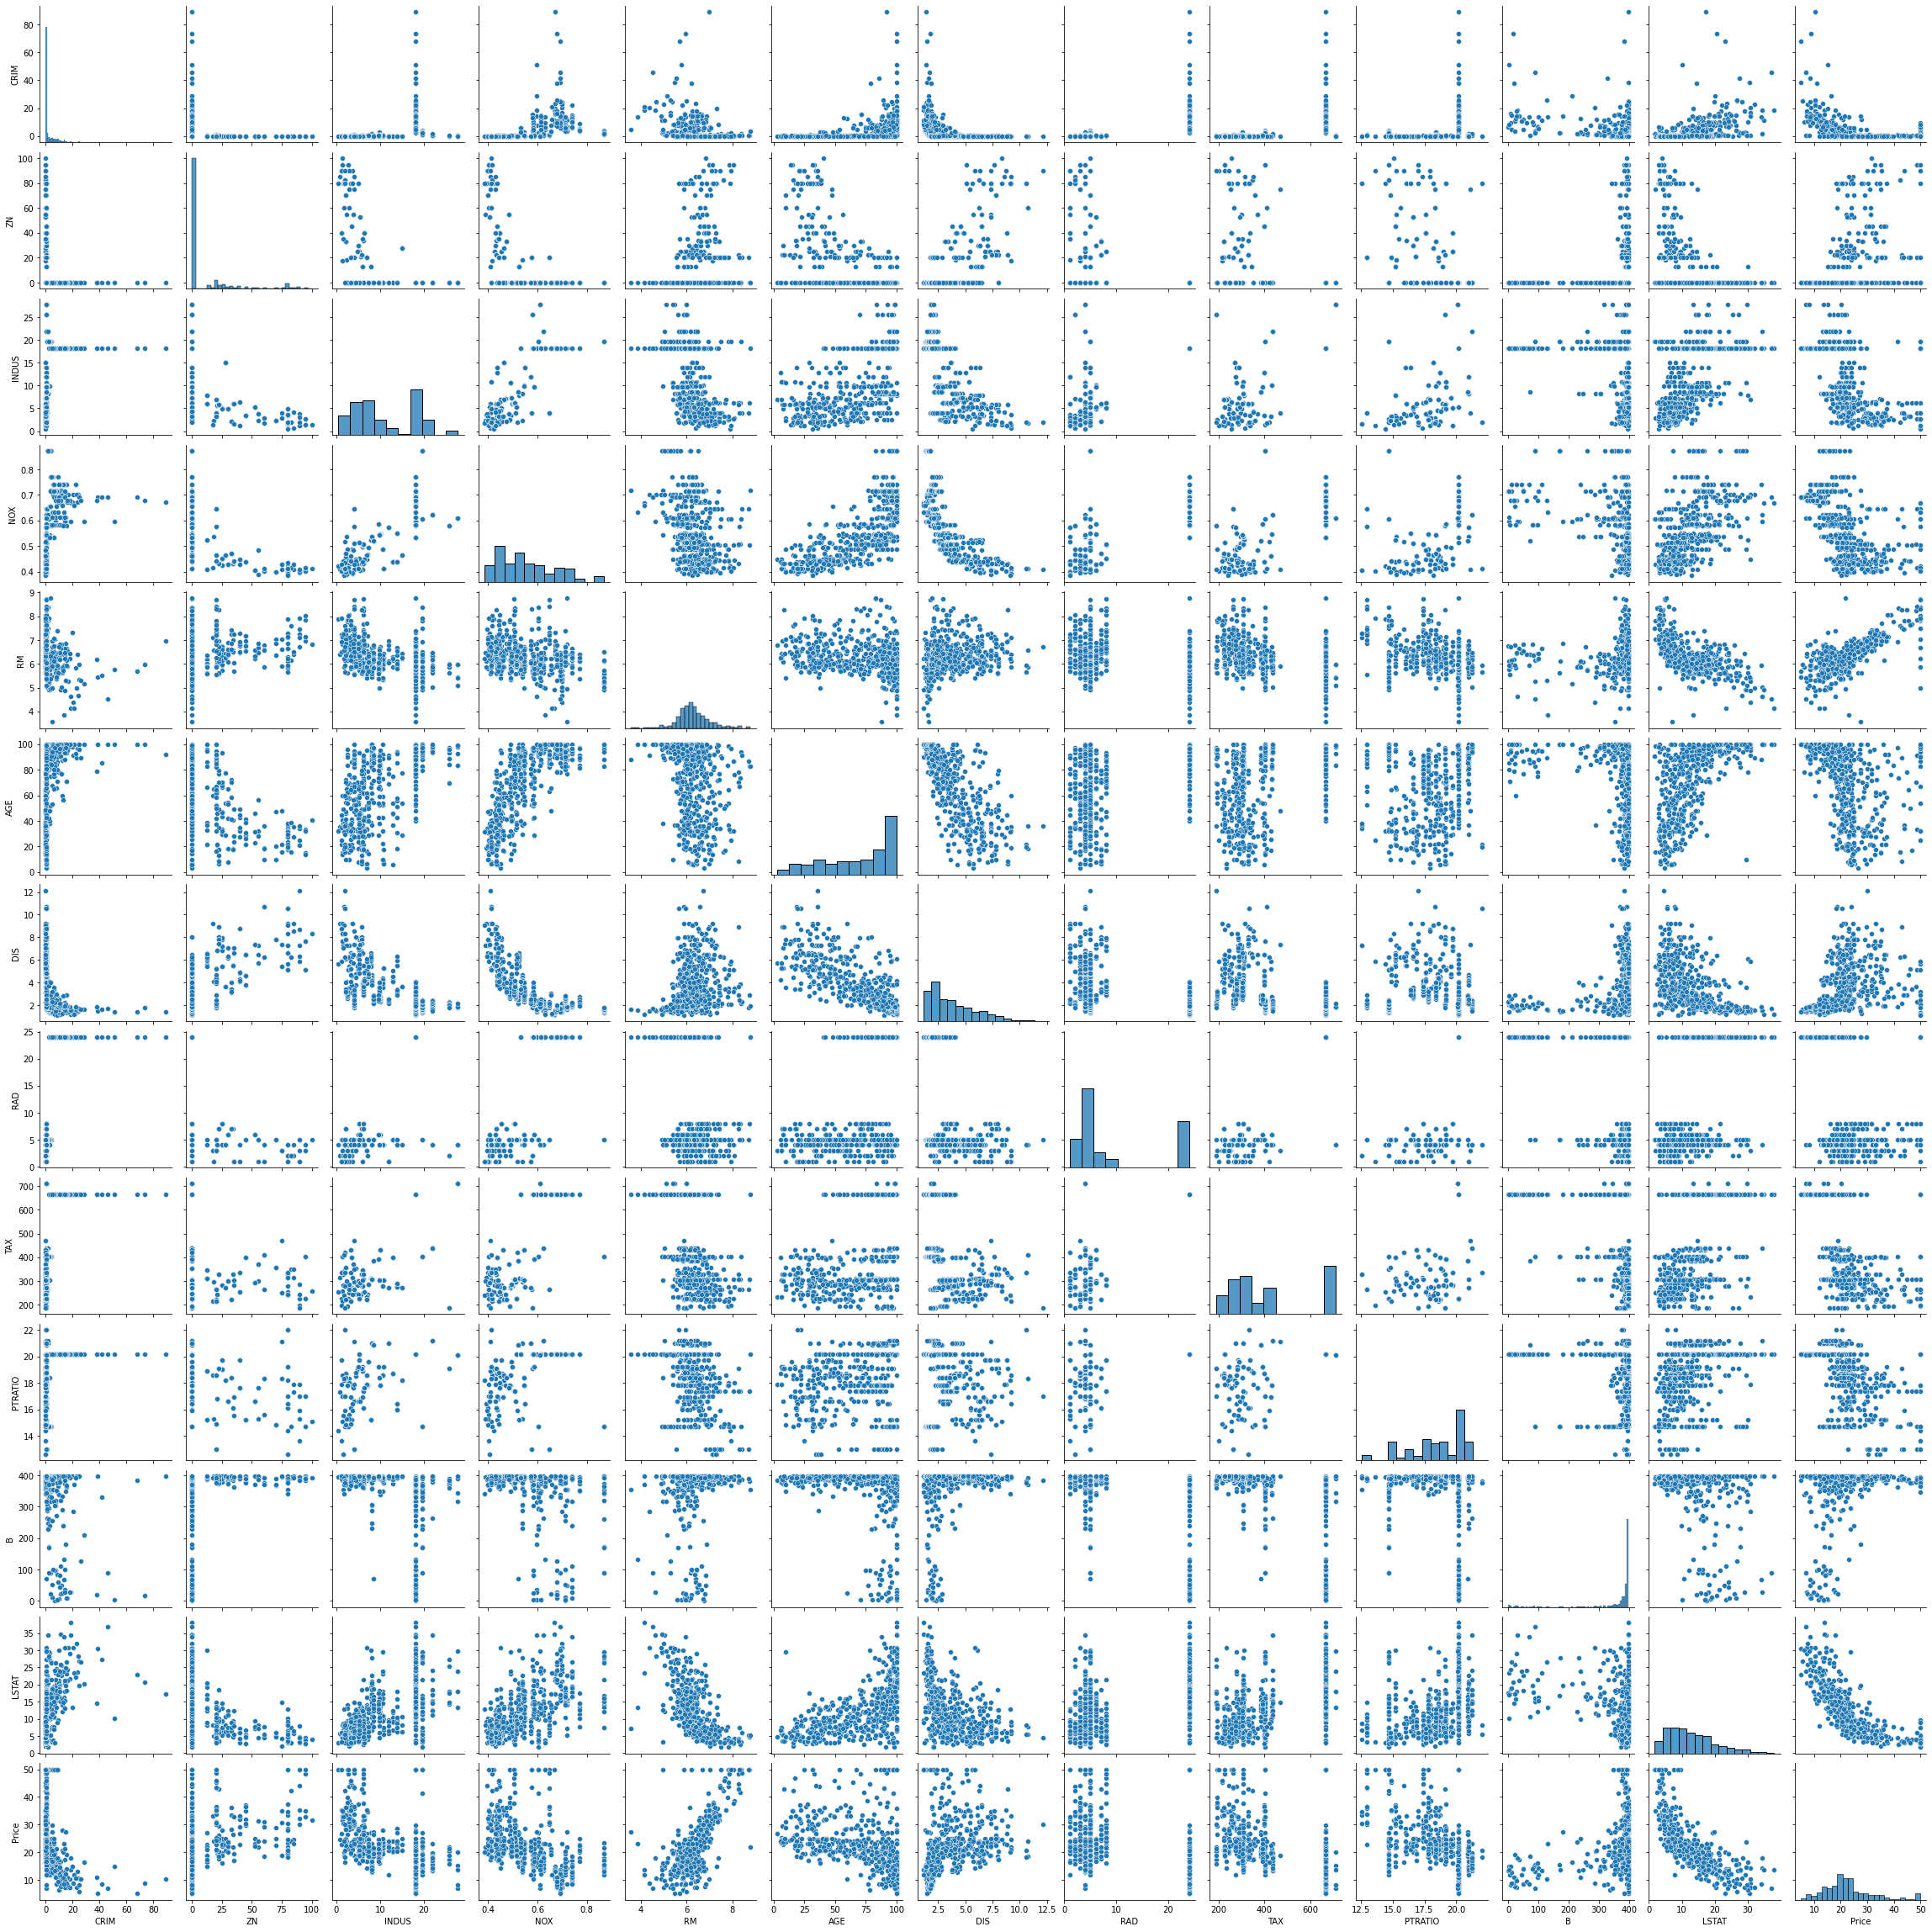

In [84]:
# Ver de forma gráfica la relación entre variables con la matriz de dispersón
sns.pairplot(df)

# 1 OLS DOS VARIABLES CON APARENTE RELACIÓN LIENAL (RM Y PRICE) <a name="1"></a>
[Índice](#indice)

Vamos a estudiar como se comporta un modelo de OLS entre dos variables 
que según la gráfica de dispersón tiene una relación lineal

In [49]:
df[['RM']]

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [51]:
# Vemos que hay una realición lienal entre RM y Price
# Vamos a realizar una regresón lienal entre estas dos variables y
# estudiar la métricas

# Crear el modelo vacío
modelo = LinearRegression()
# Entrenar el modelo: Variable indenpendiente RM y Variable dependiente Price
modelo.fit(df[['RM']],df['Price'])

LinearRegression()

In [58]:
# Mosrtar los coeficientes calculado por el modelo
print(f"B0 - punto de corte del eje  y:{modelo.intercept_}")
print(f"B1 - pendiente:{modelo.coef_[0]}")
print(f"y'={modelo.intercept_}+{modelo.coef_[0]}x") # y' => y predicha

B0 - punto de corte del eje  y:-34.67062077643857
B1 - pendiente:9.10210898118031
y'=-34.67062077643857+9.10210898118031x


In [59]:
# Predecimos y' para la misma x de entrenamiento
y_pred = modelo.predict(df[['RM']])
y_pred

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155,
       23.3735282 , 20.02395209, 18.93169901, 19.47782555, 20.81583557,
       18.43108302, 19.35039603, 19.85101202, 14.99048582, 17.45715736,
       16.02812625, 19.6234593 , 21.23453259, 18.23993873, 19.25027283,
       16.29208741, 18.23993873, 20.36983223, 24.44757706, 26.07685456,
       17.32972783, 20.59738496, 19.48692766, 17.22050253, 20.81583557,
       19.33219181, 18.49479778, 18.57671676, 19.63256141, 25.35778795,
       29.26259271, 26.95065703, 21.48028953, 21.86257811, 20.57007863,
       17.04756245, 17.99418179, 20.21509638, 14.47166561, 16.31939374,
       19.60525508, 20.98877564, 24.5932108 , 19.92382889, 18.9225969 ,
       31.31056723, 23.42814085, 27.36935404, 21.26183891, 19.27757916,
       17.58458688, 19.63256141, 24.09259481, 26.87784015, 29.99076143,
       22.58164472, 18.0032839 , 18.83157581, 16.24657686, 18.89

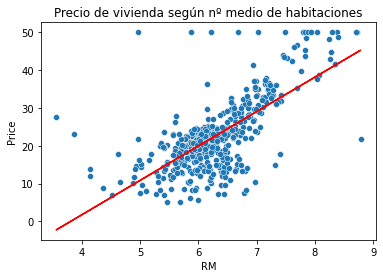

In [66]:
# Dibujar los valores reales de y para cada vlor de x
sns.scatterplot(data=df,x='RM',y='Price')
plt.title('Precio de vivienda según nº medio de habitaciones')
# Dibujar la línea de la regresión lineal
plt.plot(df['RM'],y_pred, color='red')

In [69]:
df['Price'][0]

24.0

In [76]:
# Métricas  => Miden lo bueno que es un modelo
# MSE
error = 0
for i in range(len(df)):
    error += (df['Price'][i]-y_pred[i])**2
    
mse=error/len(df)
rmse = mse**0.5

MSE:43.60055177116958
RMSE:6.6030713892225625


In [78]:
# R2
numerador = 0
denominador = 0
media = df['Price'].mean()
for i in range(len(df)):
    numerador += (y_pred[i] - media)**2
    denominador += (df['Price'][i] - media)**2
r2 = numerador / denominador

In [81]:
print(f"MSE (Media de error al cuadrado):{mse}")
print(f"RMSE:{rmse}")
print(f"R2 (% de acierto):{r2}")

MSE (Media de error al cuadrado):43.60055177116958
RMSE:6.6030713892225625
R2 (% de acierto):0.48352545599133384


In [83]:
# Calcualar métricas con funciones de sklearn
print(f"MSE (Media de error al cuadrado):{mean_squared_error(df['Price'],y_pred)}")
print(f"R2 (% de acierto):{r2_score(df['Price'],y_pred)}")

MSE (Media de error al cuadrado):43.60055177116956
R2 (% de acierto):0.48352545599133423


## Conclusión
No es modelo adecuado ya que el r2 es de un 0.48 lo que significa que nuestro modelo tiene un acierto de un 48 % (Es muy poco).
El MSE indica el error medio al cuadrado, en este caso es de 43 (suponemos que son miles de $ al cuadrado, _"lo cual no es mucho"_)

# OLS dos variables sin relaciónlienal (RAD y Price)<a name="2"></a>
[Índice](#indice)
Estudiar el modelo OLS entre dos variables que según la gráfica de dispersión no tienen relación lineal

In [85]:
# Creamos el modelo
modelo = LinearRegression()

# Entrenamos el modelo
modelo.fit(df[['RAD']],df['Price'])

# Hacer predicciones sobre los datos de entrenamiento
y_pred = modelo.predict(df[['RAD']])

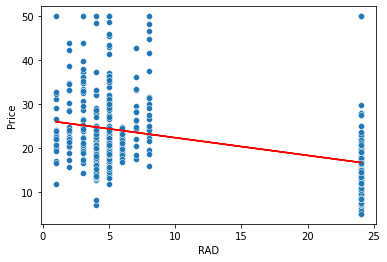

In [89]:
# Dibujar y real y y estimada
sns.scatterplot(data=df,x='RAD',y='Price')
plt.plot(df['RAD'],y_pred, color='red')

In [90]:
# Mostrar función que ha calculado el modelo
print(f"y={modelo.intercept_}+{modelo.coef_[0]}x")

y=26.382128362272397+-0.4030953955525311x


In [86]:
# Mostrar métricas
# Calcualar métricas con funciones de sklearn
print(f"MSE (Media de error al cuadrado):{mean_squared_error(df['Price'],y_pred)}")
print(f"R2 (% de acierto):{r2_score(df['Price'],y_pred)}")

MSE (Media de error al cuadrado):72.1248118807528
R2 (% de acierto):0.14563857991232532


## Conclusión
Observamos que los resultados del modelo son peores que en el ejemplo anterior (lo sospechábamos ya que no ha relación lienal entre las variables).
El % de acierto ha bajado al 14 % y el MSE ha subido a 72.

# Modelo OLS con todas las variables en df original<a name="3"></a>
[Índice](#indice)

In [97]:
# Separar variables indenpedientes de las dependientes
x = df.columns
x=x.drop('Price')

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [98]:
# Dividir df en dos conjuntos de datos: entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(df[x],df['Price'],train_size=0.80,random_state=1)

In [100]:
print(f"x_train:{x_train.shape}")
print(f"x_test:{x_test.shape}")
print(f"y_train:{y_train.shape}")
print(f"y_test:{y_test.shape}")

x_train:(404, 13)
x_test:(102, 13)
y_train:(404,)
y_test:(102,)


In [101]:
# Crear el modelo
modelo = LinearRegression()
# Entrenar el modelo sólo con los datos de entrenamiento
modelo.fit(x_train,y_train)

LinearRegression()

In [102]:
print(f"Punto de corte {modelo.intercept_}")
print(f"Coeficientes {modelo.coef_}")

Punto de corte 42.93352585337733
Coeficientes [-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
 -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
  3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
 -5.44644997e-01]


Analizamos las métricas para los datos de entrenamiento
Esto lo hacemos para ver si se produce sobreajuste: El modelo se comporta muy bien con los datos de entrenamiento y no se comporta bien con los datos de test.

In [103]:
# Predicción para los datos de entrenamiento
y_pred = modelo.predict(x_train)

In [105]:
# Métricas para los datos de entrenamiento
print(f"MSE:{mean_squared_error(y_train,y_pred)}")
print(f"R2:{r2_score(y_train,y_pred)}")

MSE:21.86279471487961
R2:0.7293585058196337


In [106]:
# Predicción para los datos de test
y_pred = modelo.predict(x_test)

In [107]:
# Métricas para los datos de test
print(f"MSE:{mean_squared_error(y_test,y_pred)}")
print(f"R2:{r2_score(y_test,y_pred)}")

MSE:23.38083648027037
R2:0.7634174432138457


In [123]:
# Ver diferencia entre y_test y y_pred
for i in range(len(y_test)):
    print(f"Valor real:{y_test.iloc[i]} \tValor estimado:{y_pred[i]}"+
    f"\tDiferencia:{y_test.iloc[i]-y_pred[i]}")

Valor real:28.2 	Valor estimado:32.655031838255354	Diferencia:-4.455031838255355
Valor real:23.9 	Valor estimado:28.093495298112536	Diferencia:-4.193495298112538
Valor real:16.6 	Valor estimado:18.0290182948473	Diferencia:-1.4290182948472996
Valor real:22.0 	Valor estimado:21.476715758965636	Diferencia:0.5232842410343643
Valor real:20.8 	Valor estimado:18.82543869812217	Diferencia:1.9745613018778307
Valor real:23.0 	Valor estimado:19.87997758148057	Diferencia:3.1200224185194294
Valor real:27.9 	Valor estimado:32.42014862617702	Diferencia:-4.5201486261770185
Valor real:14.5 	Valor estimado:18.0659776497933	Diferencia:-3.5659776497933002
Valor real:21.5 	Valor estimado:24.422778484369676	Diferencia:-2.922778484369676
Valor real:22.6 	Valor estimado:27.009778317167843	Diferencia:-4.4097783171678415
Valor real:23.7 	Valor estimado:27.040810167660503	Diferencia:-3.3408101676605035
Valor real:31.2 	Valor estimado:28.751967940442178	Diferencia:2.4480320595578213
Valor real:19.3 	Valor estimad

## Conclusión
*  Sobre los datos de entrenamiento: El modelo funciona mejor cuando se pasan todas las variables que cuando lo hemos calculado sobre dos variables. Aún así, el resultado no es bueno ya que el % de acierto es de un 72%. El MSE no es muy grande.
* Sobre los datos de test: Los resultados han mejorado un poquito en cuanto a que ha subido el R2. El MSE ha subido también un poco (esto no es bueno).
* El que los resultados sobre test sean mejores que en entrenamiento es un indicador de que no hay sobreajuste (overfitting) ya que el modelo ha funcionado mejor con los datos que no ha visto nunca (los de test).

#  Modelo OLS con df normalizado, sin outliers y sin correlación<a name="4"></a>
[Índice](#indice)

In [138]:
dfNorm
# Tenemos todas las variables independientes. La dependiente no está porque no se ha transformado 
# Cogemos la variable dependiente de df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.670290,0.918420,-1.287909,-0.144217,0.475982,-0.120013,0.148015,-0.666608,-1.477181,0.786988,-1.088749
1,-0.663949,-0.579471,-0.593381,-0.740262,0.231390,0.367166,0.572202,-0.987329,-0.309941,0.786988,-0.495302
2,-0.663955,-0.579471,-0.593381,-0.740262,1.444822,-0.265812,0.572202,-0.987329,-0.309941,0.573183,-1.224272
3,-0.662420,-0.579471,-1.306878,-0.835284,1.147817,-0.809889,1.101820,-1.106115,0.110265,0.667741,-1.379766
4,-0.651339,-0.579471,-1.306878,-0.835284,1.384468,-0.511180,1.101820,-1.106115,0.110265,0.786988,-1.038819
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.653278,-0.579471,0.115738,0.158124,0.504571,0.018673,-0.631298,-0.803212,1.184126,0.529057,-0.419694
502,-0.658523,-0.579471,0.115738,0.158124,-0.246676,0.288933,-0.723719,-0.803212,1.184126,0.786988,-0.503861
503,-0.653843,-0.579471,0.115738,0.158124,1.112875,0.797449,-0.781754,-0.803212,1.184126,0.786988,-0.994596
504,-0.639091,-0.579471,0.115738,0.158124,0.823812,0.736996,-0.674679,-0.803212,1.184126,0.605753,-0.874765


In [127]:
# División de los datos
x_train, x_test, y_train, y_test = train_test_split(dfNorm,df['Price'],test_size=0.20,random_state=1)

In [128]:
# Creación modelo
modelo = LinearRegression()
# Entrenamiento
modelo.fit(x_train,y_train)

LinearRegression()

In [129]:
# Predicciones sombre los datos de entrenamiento
y_predict = modelo.predict(x_train)

In [132]:
# Resultados del modelo en datos de entrenamiento
# Métricas para los datos de entrenamiento
print(f"MSE:{mean_squared_error(y_train,y_predict)}")
print(f"R2:{r2_score(y_train,y_predict)}")

MSE:23.389250943483926
R2:0.7104623674302797


In [133]:
# Predicciones sombre los datos de test
y_predict = modelo.predict(x_test)

In [134]:
# Resultados del modelo en datos de entrenamiento
# Métricas para los datos de entrenamiento
print(f"MSE:{mean_squared_error(y_test,y_predict)}")
print(f"R2:{r2_score(y_test,y_predict)}")

MSE:28.031722202819665
R2:0.716356747310625


## Conclusión
El resultado, en contra de lo que dice la teoría, ha sido peor que con los datos sin transformar, aunque no hay mucha diferencia.

# Conclusión final<a name="5"></a>
[Índice](#indice)

El modelo de regresión lineal no es un buen modelo para predecir el precio de viviendas de Boston.